# Part II - (Loan Prosper Data)
## by (SAGBO Carmel Prosper)

## Investigation Overview

> Going throught this document we will discuss using visualisatio exploratory process presented here focused on :
    - which group of people demanding the most and highest loans, and also what is their salary range.
    - why people without income veriable have gotten loan
    - Is the loan attribute following correct choice ?

## Dataset Overview

> Prosper Loan Data set contain 113 937 loan with 81 variables to describe each observation about the borrower, the loan. Because of the large number of variable that we have, my first thougth was to sort the relation between all varaible to see if we are in case of merged dataset or informatio from different source. By following this exploration I found that we some variables have more thant __25%__ of their values null.
With wrangling process, 12 variables have been selected.  

In [28]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [29]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df = df[df.columns[(df.isnull().sum()/len(df)*100) < 15 ]]
df_main = df[['IsBorrowerHomeowner', 'IncomeVerifiable','IncomeRange', 'LoanStatus', 'Occupation', 'EmploymentStatus', 'LoanOriginalAmount','BorrowerRate','EmploymentStatusDuration', 'DebtToIncomeRatio','MonthlyLoanPayment', 'TotalCreditLinespast7years', 'DelinquenciesLast7Years']]

In [30]:
""" Create Occupation Group with existing Occupation in a dataset"""
def occupation_group(df):
    if df['Occupation'] in['Food Service Management', 'Food Service', 'Social Worker', 'Waiter/Waitress']:
        return 'Food And Services'
    elif df['Occupation'] in['Scientist', 'Psychologist', 'Biologist', 'Chemist', 'Dentist', 'Doctor', 'Pharmacist', 'Medical Technician', 'Nurse (RN)',  "Nurse's Aide",  'Nurse (LPN)']:
        return 'Health And Science'
    elif df['Occupation'] in ['Pilot - Private/Commercial',  'Retail Management', 'Sales - Commission', 'Car Dealer', 'Attorney', 'Accountant/CPA', 'Investor']:
        return 'Economy'
    elif df['Occupation'] in ['Engineer - Electrical', 'Architect', 'Engineer - Mechanical',  'Engineer - Chemical', 'Construction', 'Landscaping', 'Professional', 'Computer Programmer', 'Analyst']:
        return 'Professional And Enginneering'
    elif df['Occupation'] in ['Tradesman - Plumber', 'Tradesman - Carpenter', 'Tradesman - Electrician', 'Laborer', 'Skilled Labor', 'Tradesman - Mechanic', 'Homemaker',  'Truck Driver', 'Bus Driver']:
        return 'Laborer'
    elif df['Occupation'] in ['Civil Service', 'Executive', 'Administrative Assistant',  'Postal Service', 'Military Enlisted', 'Judge',  'Police Officer/Correction Officer', 'Military Officer',  'Flight Attendant', 'Fireman', 'Realtor']:
        return 'Administrative'
    elif df['Occupation'] in ['Principal', "Teacher's Aide",  'Professor', 'Teacher']:
        return 'School Head'
    elif df['Occupation'] in ['Student - College Senior','Student - College Junior', 'Student - College Graduate Student', 'Student - Technical School',  'Student - Community College', 'Student - College Freshman', 'Student - College Sophomore']:
        return 'School Head'
    elif df['Occupation'] in ['Religious', 'Clergy', 'Clerical']:
        return 'Religious'
    else:
        return 'Other' 
    
df_main['OccuGroup'] = df_main.apply(occupation_group, axis=1)
df_main['OccuGroup'].value_counts() 

Other                            35002
Professional And Enginneering    26703
Administrative                   14389
Economy                          10920
Laborer                           8102
Health And Science                6195
School Head                       5603
Food And Services                 3539
Religious                         3484
Name: OccuGroup, dtype: int64

### What is/are the main feature(s) of interest in your dataset?

> __IsBorrowerHomeowner__ : A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

> __IncomeVerifiable__ : The borrower indicated they have the required documentation to support their income.

> __IncomeRange__ : The income range of the borrower at the time the listing was created.

> __LoanStatus__ : The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

> __Occupation__ : The Occupation selected by the Borrower at the time they created the listing.

> __EmploymentStatus__ : The employment status of the borrower at the time they posted the listing.

> __LoanOriginalAmount__ : The origination amount of the loan.

> __BorrowerRate__ : The Borrower's interest rate for this loan. 

> __EmploymentStatusDuration__ : EmploymentStatusDuration

> __DebtToIncomeRatio__ : The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

> __MonthlyLoanPayment__ : The scheduled monthly loan payment.

> __TotalCreditLinespast7years__ : Number of credit lines in the past seven years at the time the credit profile was pulled.

> __DelinquenciesLast7Years__ : Number of delinquencies in the past 7 years at the time the credit profile was pulled.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> __LoanStatus__ : The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

> __Occupation__ : The Occupation selected by the Borrower at the time they created the listing.
 
> This specifique variable has been used to create the 
    __OccuGroup__ : Designation of Occupation Group

> __LoanOriginalAmount__ : The origination amount of the loan.

> __MonthlyLoanPayment__ : The scheduled monthly loan payment.


Then from our occupation field we have gotten the following classification: 
###### Other
> [nan, 'Other']


###### Religious
> ['Religious', 'Clergy', 'Clerical'],


###### Food And Services
> ['Food Service Management', 'Food Service', 'Social Worker', 'Waiter/Waitress']


###### Health And Science

> ['Scientist', 'Psychologist', 'Biologist', 'Chemist', 'Dentist', 'Doctor', 'Pharmacist', 'Medical Technician', 'Nurse (RN)',  "Nurse's Aide",  'Nurse (LPN)']


##### Economy
> ['Pilot - Private/Commercial',  'Retail Management', 'Sales - Commission', 'Car Dealer', 'Attorney', 'Accountant/CPA', 'Investor']


###### Professional And Enginneering
> ['Engineer - Electrical', 'Architect', 'Engineer - Mechanical',  'Engineer - Chemical', 'Construction', 'Landscaping', 'Professional', 'Computer Programmer', 'Analyst']


###### Laborer
> ['Tradesman - Plumber', 'Tradesman - Carpenter', 'Tradesman - Electrician', 'Laborer', 'Skilled Labor', 'Tradesman - Mechanic', 'Homemaker',  'Truck Driver', 'Bus Driver']


###### Administrative
> ['Civil Service', 'Executive', 'Administrative Assistant',  'Postal Service', 'Military Enlisted', 'Judge',  'Police Officer/Correction Officer', 'Military Officer',  'Flight Attendant', 'Fireman', 'Realtor']


######  School Head
> ['Principal', "Teacher's Aide",  'Professor', 'Teacher']

###### Students
>['Student - College Senior','Student - College Junior', 'Student - College Graduate Student', 'Student - Technical School',  'Student - Community College', 'Student - College Freshman', 'Student - College Sophomore']

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Borrower With Income verifiable)

> Most of loans are recorded to people with income verifiable. We should discuss later about the case of people without verifiable income.

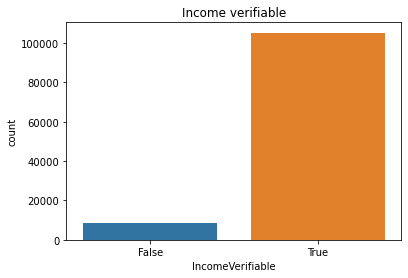

In [31]:
sns.countplot(data= df_main, x = 'IncomeVerifiable').set_title('Income verifiable')
plt.show()

## (Occupation Group Distribution)

> With the Occupation variable we have many occupation, so to able to have a view through it we change it to group of ocuppation. Like that we are able to get an observation and most of loans have known jobs classified in groups above. Engineers are the most getting loans.

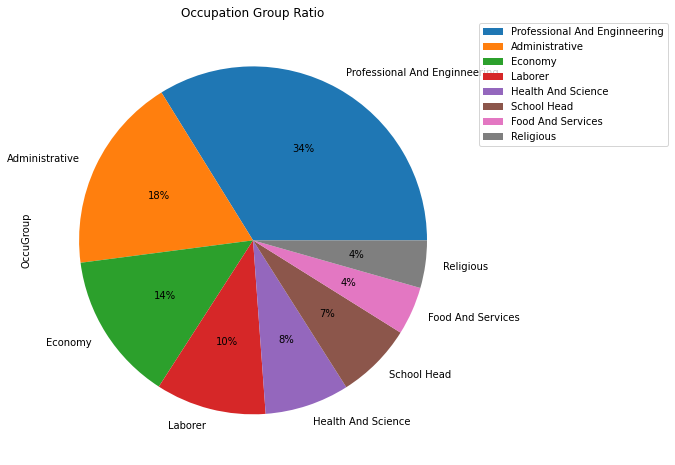

In [32]:
plt.figure(figsize=(10,8))
df_main[df_main.OccuGroup != "Other"]['OccuGroup'].value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Occupation Group Ratio')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

## (Loan status distributions)
> There is barely any past due following this visualization. We can conclude that Prosper Employees has doing great Job in Borrower selection.

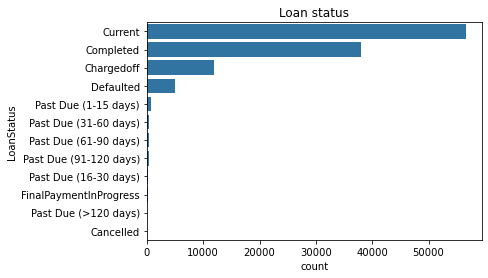

In [33]:
colors =  sns.color_palette()[0]
loan_status_orders = df_main.LoanStatus.value_counts().index
sns.countplot(data= df_main, y = 'LoanStatus', color= colors, order=loan_status_orders).set_title('Loan status')
plt.show()

## (Loan Amount according to Borrower Rate)
> To have a glinps at what the team have done selecting the Borrower let's look this. The Highest the loan is the Borrower rate decrease. Prosper ensure they are getting best interest rate to cover any futher lost from those who cannot pay

In [34]:
### For the remains analysys we are changing the dataset to look only for those with known Occupation
df_main = df_main[df_main.OccuGroup != "Other"]

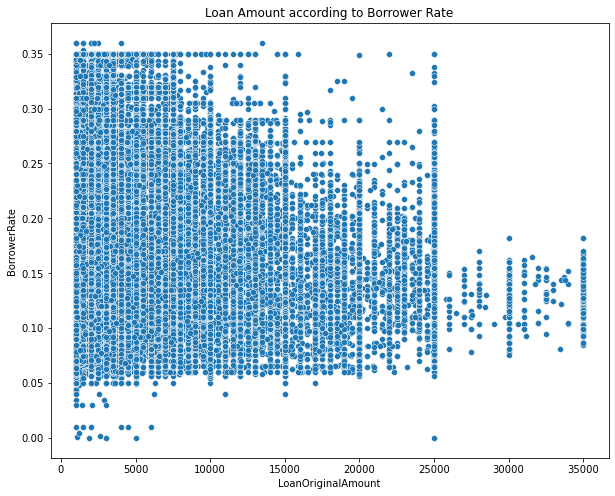

In [35]:
# colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10,8))
# sns.scatterplot(x=df_main.LoanOriginalAmount, y=df_main.MonthlyLoanPayment)
sns.scatterplot(data = df_main, x = 'LoanOriginalAmount', y = 'BorrowerRate').set_title('Loan Amount according to Borrower Rate') 
plt.show()

## Loan Original Amount Distribution based on Occupation 
> The most in demand and highest group in need of loans are : (Health And Science, Professional And Engineering)

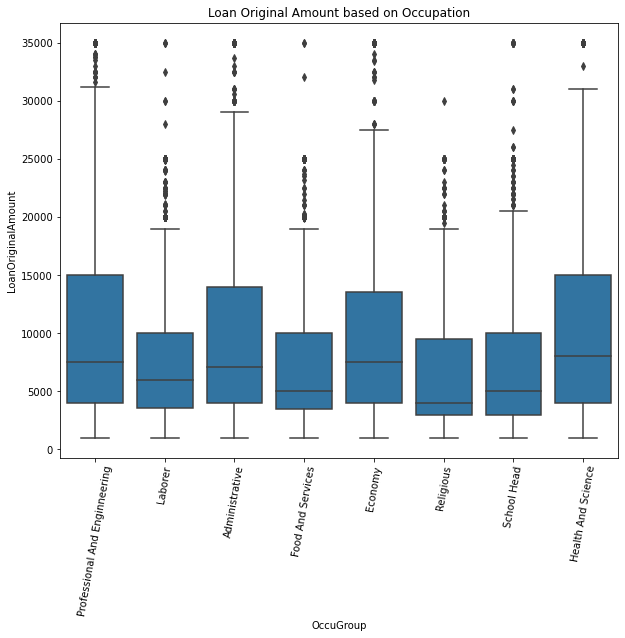

In [36]:
plt.figure(figsize=(10,8))
base_color = sns.color_palette()[0]
sns.boxplot(data=df_main, y='LoanOriginalAmount', x='OccuGroup', color=base_color).set_title('Loan Original Amount based on Occupation')
plt.xticks(rotation=80)
plt.show()

## (Delinquencies impact for no income verifiable on loan)
> There is not really something specific explaining the loan for people without income verifiable.

<Figure size 1440x1440 with 0 Axes>

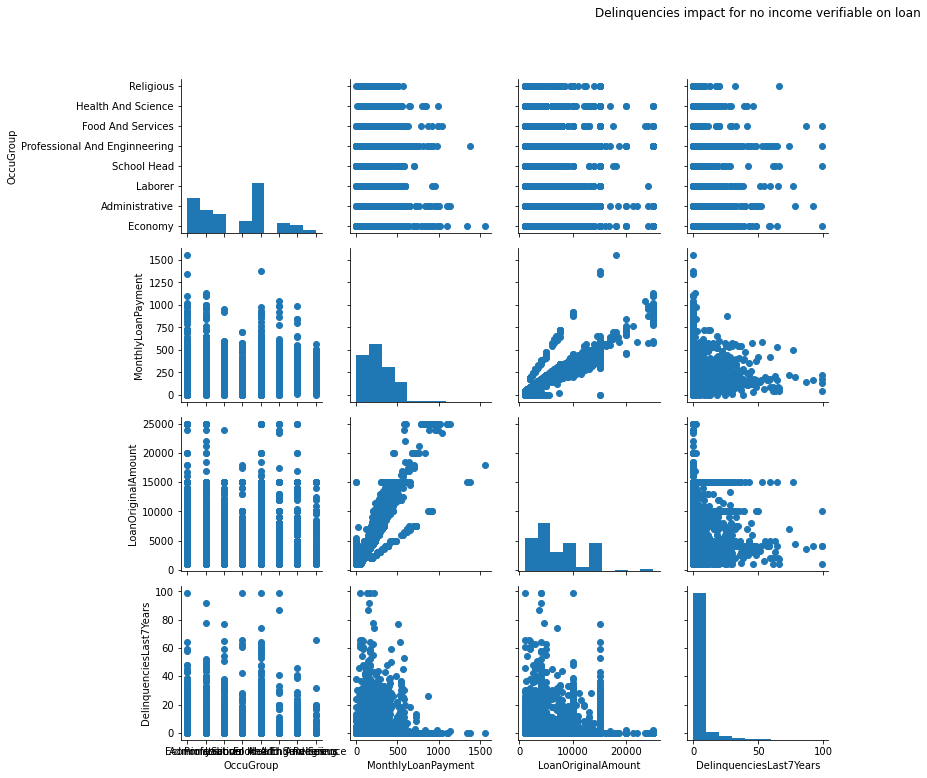

In [37]:
plt.figure(figsize=(20,20))
g = sns.PairGrid(data = df_main[df_main.IncomeVerifiable == False], vars = ['OccuGroup', 'MonthlyLoanPayment', 'LoanOriginalAmount', 'DelinquenciesLast7Years'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.xticks(rotation=45);
plt.title('Delinquencies impact for no income verifiable on loan', loc= 'center', pad=400)
plt.show()

> Now we have proceed with univariate, bivariate and multivariate exploration and finally get which group of people demanding the most and highest loans, and also what is their salary range. But Something bizarre actually is that we did not understand why people without income veriable have gotten loan. Finally the teams working to select Borrowers are doing great job.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [38]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/bash: line 1: Part_II_Filename: No such file or directory


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
